<a href="https://colab.research.google.com/github/gmaad/MetodyKlasRed/blob/main/Copy_of_List_nr_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIST NR 2: PCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import decomposition # for PCA

**IRIS data set**

In [ ]:
iris=datasets.load_iris()

Z = iris.data # for dimensional data (here n=nr of rows = number of data, d=4 dimension)
print(Z.shape)

(150, 4)


## Q2.1

* a) check and figure out what following commands show:
```  
print(iris.target)
print(iris.feature_names)
print(iris.target_names)
```

In [ ]:
print(iris.target)
print(iris.feature_names)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


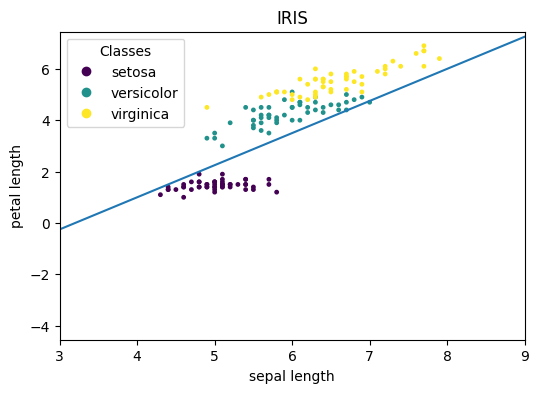

In [ ]:
sepal_length=iris.data[:,0]
petal_length=iris.data[:,2]

fig, ax = plt.subplots(figsize=(6, 4) )

scatter = ax.scatter(sepal_length, petal_length,s=6, c=iris.target)
ax.set_title("IRIS")
ax.set_xlabel("sepal length")
ax.set_xlim([3,9])
ax.set_ylabel("petal length")
fig = ax.legend(scatter.legend_elements()[0], iris.target_names, title = "Classes")
plt.axline((0,-4), slope = 1.25)
plt.show()

* b) plot each species with different color
* c) change x-label range: from 3 to 9
* d) display only integer labels x and y
* e) add line $y=1.25x-4$ to the plot

**MNIST dataset**

In [ ]:
mnist = datasets.load_digits()
max_n=600
mnist_points =        mnist.data[:max_n]
mnist_data_classes =  mnist.target[:max_n]
mnist_classes  =      mnist.target_names

In [ ]:
mnist_points.shape

(600, 64)

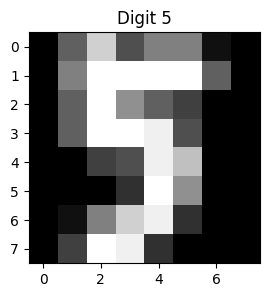

In [ ]:
k=33

fig, ax = plt.subplots(figsize=(3,3) )
ax.imshow(mnist_points[k].reshape(8,8), cmap='gray')
ax.set_title('Digit ' + str(mnist_data_classes[k]))
plt.show()

**PCA:**

In [ ]:
#(recall, Z i iris data, 4d points)

#2d

pca = decomposition.PCA(n_components=2)
pca.fit(Z)
iris_points_pca_2d = pca.transform(Z)
print(iris_points_pca_2d.shape)

(150, 2)


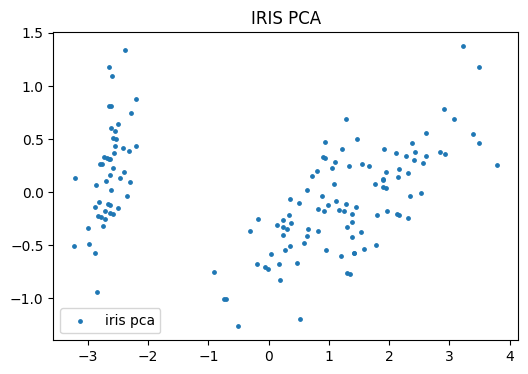

In [ ]:

fig, ax = plt.subplots(figsize=(6, 4) )

ax.scatter(iris_points_pca_2d[:,0], iris_points_pca_2d[:,1],s=6, label="iris pca")
ax.set_title("IRIS PCA")
ax.legend()
plt.show()

In [ ]:
#3d

pca3 = decomposition.PCA(n_components=3)
pca3.fit(Z)
iris_points_pca_3d = pca3.transform(Z)
print(iris_points_pca_3d.shape)

(150, 3)


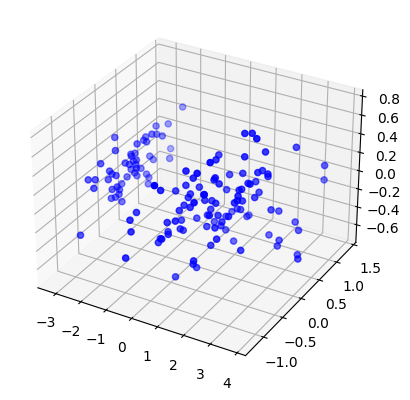

In [ ]:
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris_points_pca_3d[:,0],iris_points_pca_3d[:,1],iris_points_pca_3d[:,2], color='blue' )

# Q2.2

* a) Draw IRIS PCA 2d and 3d, different species with different colors
* b) Draw MNIST PCA 2d and 3d data
* c) Simulate 500 points from $N(\boldsymbol{\mu},\boldsymbol{\Sigma})$, where
$$\boldsymbol{\mu}=(4,6,5)^T,
\boldsymbol{\Sigma}=\left(
  \begin{array}{llll}
  14 & 16 & 14 \\
  16 & 21 & 14 \\
  14 & 14 & 26
  \end{array}\right)$$
and draw them.
* d) Reduce the points to 2d via PCA. Draw these 2d points on a separate plot
* e) Reconstruction: using PCA matrix, convert these 2d points back to 3d, plot them together with original points (with different color)

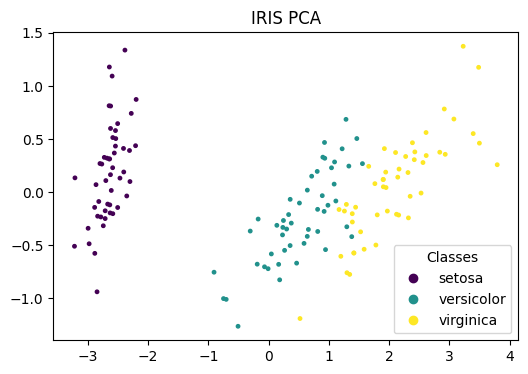

In [ ]:
# a) Iris PCA 2D

pca = decomposition.PCA(n_components=2)
pca.fit(Z)
iris_points_pca_2d = pca.transform(Z)

fig, ax = plt.subplots(figsize=(6, 4) )

scatter = ax.scatter(iris_points_pca_2d[:,0], iris_points_pca_2d[:,1],s=6, c = iris.target)
ax.set_title("IRIS PCA")
fig = ax.legend(scatter.legend_elements()[0], iris.target_names, title = "Classes")
plt.show()

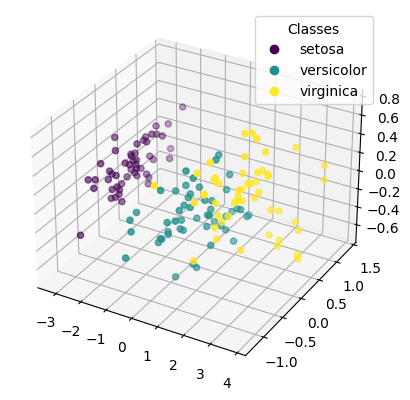

In [ ]:
# a) Iris PCA 3D

pca3 = decomposition.PCA(n_components=3)
pca3.fit(Z)
iris_points_pca_3d = pca3.transform(Z)

fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(iris_points_pca_3d[:,0],iris_points_pca_3d[:,1],iris_points_pca_3d[:,2], c=iris.target)
fig = ax.legend(scatter.legend_elements()[0], iris.target_names, title = "Classes")
plt.show()


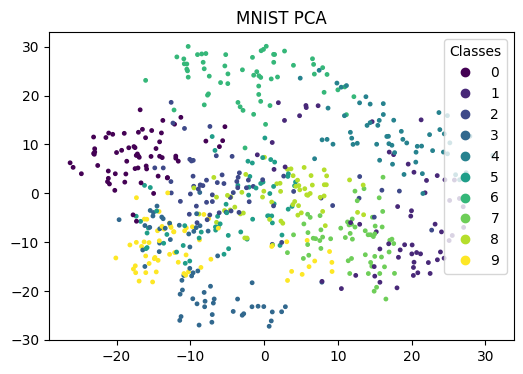

In [ ]:
# b) MNIST 2D

mnist = datasets.load_digits()
max_n=600
mnist_points =        mnist.data[:max_n]
mnist_data_classes =  mnist.target[:max_n]
mnist_classes  =      mnist.target_names

Z = mnist.data[:max_n]
pca = decomposition.PCA(n_components=2)
pca.fit(Z)
mnist_points_pca_2d = pca.transform(Z)

fig, ax = plt.subplots(figsize=(6, 4) )

scatter = ax.scatter(mnist_points_pca_2d[:,0], mnist_points_pca_2d[:,1],s=6, c = mnist_data_classes)
ax.set_title("MNIST PCA")
fig = ax.legend(scatter.legend_elements()[0], mnist.target_names, title = "Classes")
plt.show()

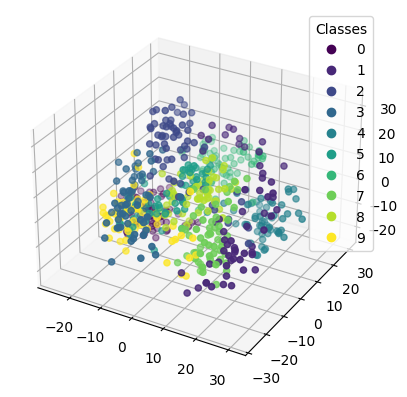

In [ ]:
# b) MNIST 3D

pca3 = decomposition.PCA(n_components=3)
pca3.fit(Z)
mnist_points_pca_3d = pca3.transform(Z)

fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(mnist_points_pca_3d[:,0],mnist_points_pca_3d[:,1],mnist_points_pca_3d[:,2], c=mnist_data_classes)
fig = ax.legend(scatter.legend_elements()[0], mnist.target_names, title = "Classes")
plt.show()

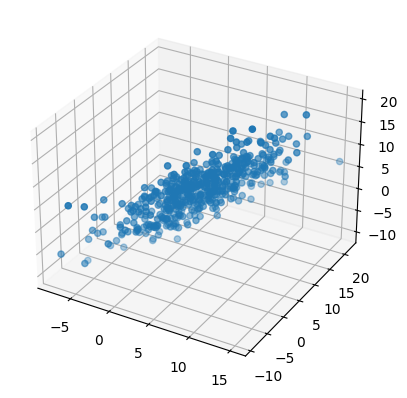

In [ ]:
# c)
mu = [4,6,5]
sigma = [[14,16,14], [16,21,14], [14,14,26]]
points = np.random.multivariate_normal(mu, sigma, 500)


fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(points[:,0],points[:,1],points[:,2])
plt.show()

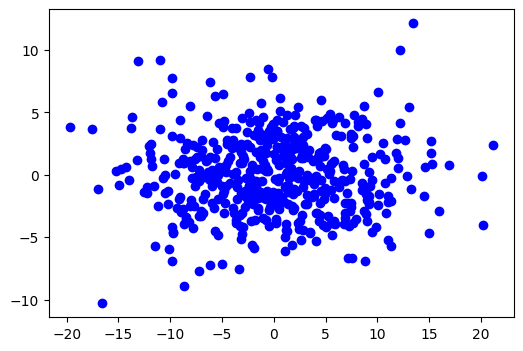

In [ ]:
# d)
pca = decomposition.PCA(n_components=2)
pca.fit(points)
points_pca_2d = pca.transform(points)

fig, ax = plt.subplots(figsize=(6, 4) )
scatter = ax.scatter(points_pca_2d[:,0],points_pca_2d[:,1],color='blue', label = "points pca")
plt.show()

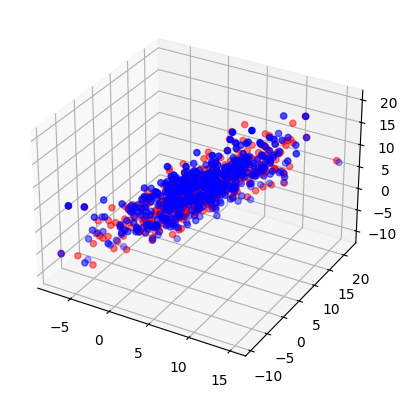

In [ ]:
# e)
inversePCA = pca.inverse_transform(points_pca_2d)
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
scatter1 = ax.scatter(points[:,0],points[:,1],points[:,2], color = 'blue')
scatter2 = ax.scatter(inversePCA[:,0],inversePCA[:,1],inversePCA[:,2], color = 'red', alpha = 0.5)

plt.show()
